# Exploratory Data Analysis

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# packages and load
from atel.data import BookCollection
book_col = BookCollection(data_file='./book_col_271120.pkl')

Loaded from disk: ./book_col_271120.pkl


In [3]:
# Total number of books
print(f'Number of books: {book_col.num_books}')

Number of books: 803


In [4]:
for key, value in book_col[0].code_dict.items():
    print(f"\t{key:25s}\t{value}")

	Genre                    	['Selvportræt']
	Attitude                 	['Bedømmelse positiv']
	Stavning                 	['Semifonetisk']
	Perspektiv               	Eksplicit fortæller
	Tekstbånd                	
	Fremstillingsform        	['Beskrivende']
	Semantisk univers        	['Mennesker']
	Holistisk vurdering      	1
	Stemmer                  	['En stemme']


In [108]:
features = []

for i in range(book_col.num_books):
    if book_col[i].code_dict is None:
        print(i)
        continue
    else:
        features.append(book_col[i].code_dict)

509


Here, we notice that book with index 509 does not have a `code_dict` describing the features

In [120]:
feat_df = pd.DataFrame(features)

In [182]:
feat_df

,Genre,Attitude,Stavning,Perspektiv,Tekstbånd,Fremstillingsform,Semantisk univers,Holistisk vurdering,Stemmer,Forbindere,Interjektioner,Metaforbrug,Noter
0,[Selvportræt],[Bedømmelse positiv],[Semifonetisk],Eksplicit fortæller,,[Beskrivende],[Mennesker],1,[En stemme],NaN,NaN,NaN,NaN
1,[Rim og remser],NaN,[Fonetisk],Implicit fortæller,[Semantisk],[Beskrivende],[Vilde dyr],1,[En stemme],NaN,NaN,NaN,NaN
2,,[Følelse 1. person],[Semifonetisk],Eksplicit fortæller,NaN,[Beskrivende],[Mig selv],0,[En stemme],[Tilføjelse],NaN,NaN,NaN
3,[Hverdagsbeskrivelse],NaN,"[Semifonetisk, Fonetisk]",Implicit fortæller,NaN,[Beskrivende],[Kæledyr],1,[En stemme],NaN,NaN,NaN,NaN
4,[Hverdagsbeskrivelse],[Følelse 3. person],[Konventionel skrivning],Implicit fortæller,NaN,[Beskrivende],[Familie],2,[En stemme],NaN,[Attitude],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,[Fagbog],"[Bedømmelse positiv, Vurdering positiv]",[Overgangsskrivning],Implicit fortæller,[Pronominel],[Beskrivende],"[Bøger, film, musik, computerspil]",3,[Flere konkrete stemmer],"[Tid, Modsætning]",NaN,NaN,NaN
798,[Særdagsberetning],[Vurdering positiv],[Konventionel skrivning],Eksplicit fortæller,[Pronominel],"[Berettende, Instruerende, Holdningstilkendegi...",[Oplevelse],5,[En stemme],"[Tid, Årsag, Modsætning, Tilføjelse]",NaN,NaN,NaN
799,[Hverdagsbeskrivelse],[Bedømmelse positiv],[Konventionel skrivning],Implicit fortæller,NaN,[Holdningstilkendegivelse],[Kæledyr],1,[En stemme],NaN,NaN,NaN,NaN
800,[Hverdagsbeskrivelse],NaN,[Konventionel skrivning],Eksplicit fortæller,NaN,[Beskrivende],[Skole],2,[En stemme],[Modsætning],NaN,NaN,NaN


We see that some of the features have lists as values, e.g. one book can belong to multiple genres, accordingly to the PDF that is given as a supplement. These features are `Genre`, `Attitude`, `Stavning`, `Perspektiv`, `Tekstbånd`, `Fremstillingsform`, `Semantisk univers`, `Stemmer`, `Forbindere`, `Interjektioner`.

Let us take a closer look at how many of these exactly belong to multiple categories:

In [195]:
feat_df.Genre.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    781
0     15
2      6
Name: Genre, dtype: int64

In [196]:
feat_df.Attitude.map(lambda x: len(x) if type(x) == list else 0).value_counts()

0    351
1    279
2    111
3     53
4      7
5      1
Name: Attitude, dtype: int64

In [197]:
feat_df.Stavning.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    780
2     12
0     10
Name: Stavning, dtype: int64

In [181]:
feat_df.Tekstbånd.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    277
0    205
2    204
3     96
4     20
Name: Tekstbånd, dtype: int64

In [198]:
feat_df.Fremstillingsform.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    582
2    147
0     45
3     28
Name: Fremstillingsform, dtype: int64

In [200]:
feat_df['Semantisk univers'].map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    739
2     40
0     16
3      6
4      1
Name: Semantisk univers, dtype: int64

In [201]:
feat_df.Stemmer.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    790
0      8
2      4
Name: Stemmer, dtype: int64

In [202]:
feat_df.Forbindere.map(lambda x: len(x) if type(x) == list else 0).value_counts()

0    430
1    208
2     98
3     42
4     20
5      4
Name: Forbindere, dtype: int64

In [203]:
feat_df.Interjektioner.map(lambda x: len(x) if type(x) == list else 0).value_counts()

0    656
1    130
2     16
Name: Interjektioner, dtype: int64

*Hvad ser vi?*

In [180]:
feat_df.Perspektiv.value_counts()

Implicit fortæller     480
Eksplicit fortæller    322
Name: Perspektiv, dtype: int64

<AxesSubplot:>

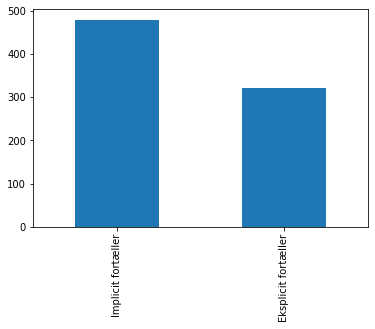

In [205]:
feat_df.Perspektiv.value_counts().plot(kind='bar')